Loaded cleaned dataset: (97629, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.715849e+09,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1.0,1.0,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55.0
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1.715849e+09,2024-05-16 10:45:00,19.0,66.2,Partly cloudy,...,1.1,2.0,1.0,1.0,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55.0
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1.715849e+09,2024-05-16 09:45:00,23.0,73.4,Sunny,...,10.4,18.4,1.0,1.0,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55.0
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1.715849e+09,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,0.7,0.9,1.0,1.0,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55.0
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1.715849e+09,2024-05-16 09:45:00,26.0,78.8,Partly cloudy,...,183.4,262.3,5.0,10.0,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55.0



=== Data Cleaning Summary ===
Total rows: 97629
Total locations: 254
Total countries: 211
Date range: 2024-05-16 01:45:00 to 2025-09-30 21:00:00

=== Exploratory Data Analysis Summary ===


,temperature_celsius,precip_mm,humidity,wind_kph,cloud
count,97629.000000,97629.000000,97629.000000,97629.000000,97629.000000
mean,22.828003,0.107276,64.173442,13.213681,39.344805
std,8.785187,0.312056,24.187910,8.300394,33.752506
min,-12.700000,0.000000,2.000000,3.600000,0.000000
25%,18.100000,0.000000,47.000000,6.500000,0.000000
50%,25.000000,0.000000,69.000000,11.200000,26.000000
75%,28.300000,0.030000,83.000000,18.400000,75.000000
max,49.200000,2.540000,100.000000,63.700000,100.000000


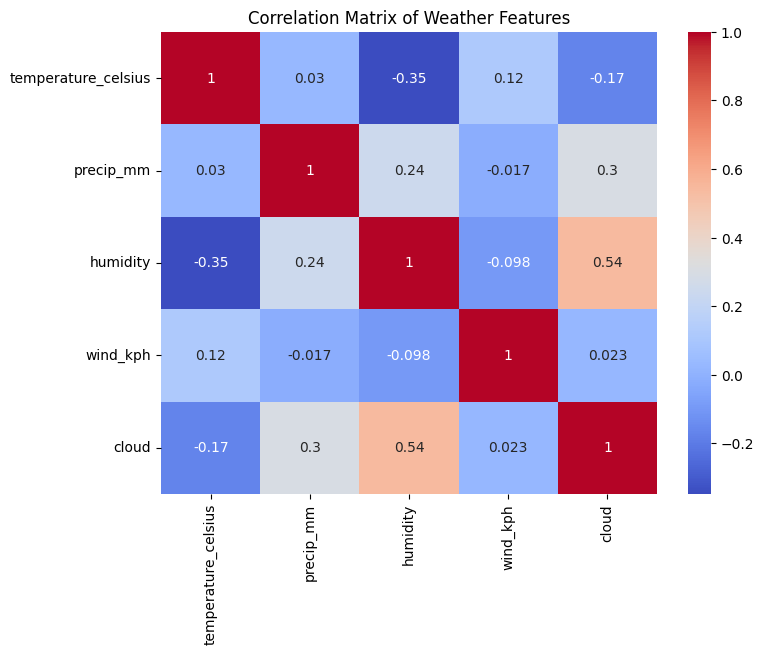

✅ Figure saved: c:\Users\kumar\OneDrive\Desktop\Pm accelerator\weather-trend-forecast\reports\figures\correlation_matrix_summary.png


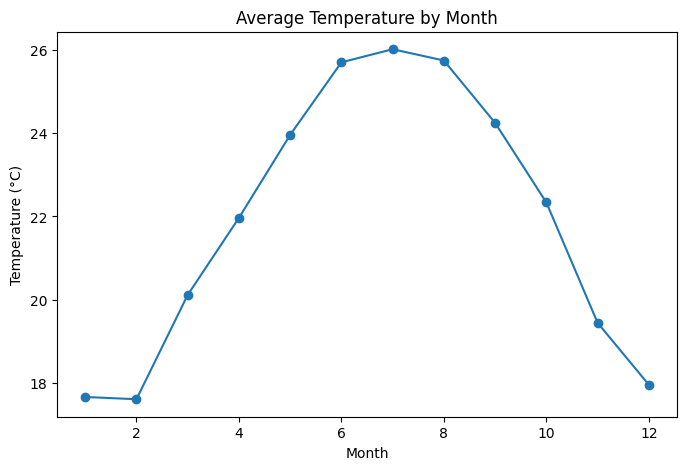

✅ Figure saved: c:\Users\kumar\OneDrive\Desktop\Pm accelerator\weather-trend-forecast\reports\figures\avg_temp_by_month_summary.png


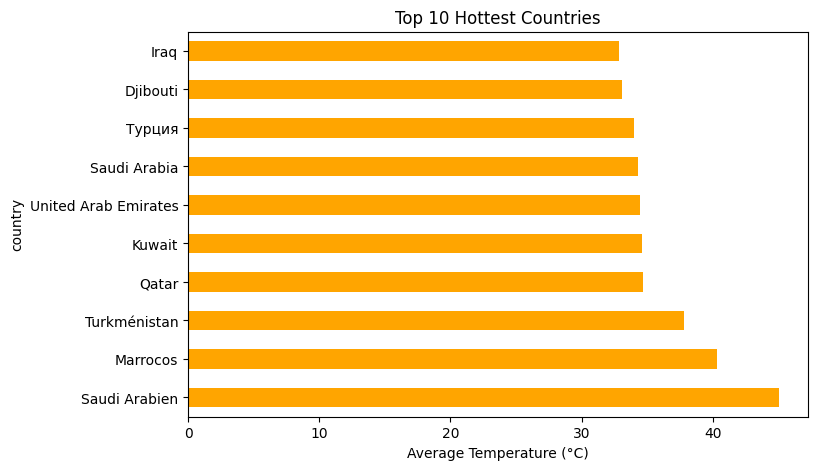

✅ Figure saved: c:\Users\kumar\OneDrive\Desktop\Pm accelerator\weather-trend-forecast\reports\figures\top_countries_summary.png

=== Forecasting Summary ===
Forecasting metrics available in Notebook 04.

=== Next Steps / Recommendations ===
- Extend forecasting to all major locations using ensemble models
- Incorporate air quality and environmental impact analysis
- Visualize spatial patterns using GIS maps
- Explore long-term climate patterns across continents
- Consolidate all EDA, anomalies, and forecasting figures in final report/slides


In [4]:
# ============================================================
# Weather Trend Forecasting: 06 Results & Summary
# ============================================================

# ---------------------------
# Step 0: Setup
# ---------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Project root & figures folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
figures_dir = os.path.join(project_root, "reports", "figures")
os.makedirs(figures_dir, exist_ok=True)

# ---------------------------
# Step 1: Load cleaned data
# ---------------------------
cleaned_csv_path = os.path.join(project_root, "data", "processed", "weather_cleaned.csv")
df = pd.read_csv(cleaned_csv_path)
df["last_updated"] = pd.to_datetime(df["last_updated"])

print(f"Loaded cleaned dataset: {df.shape}")
display(df.head())

# ---------------------------
# Step 2: Data Cleaning Summary
# ---------------------------
print("\n=== Data Cleaning Summary ===")
print(f"Total rows: {len(df)}")
print(f"Total locations: {df['location_name'].nunique()}")
print(f"Total countries: {df['country'].nunique()}")
print(f"Date range: {df['last_updated'].min()} to {df['last_updated'].max()}")

# ---------------------------
# Step 3: EDA Overview
# ---------------------------
print("\n=== Exploratory Data Analysis Summary ===")
numeric_cols = ['temperature_celsius','precip_mm','humidity','wind_kph','cloud']
display(df[numeric_cols].describe())

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Weather Features")
corr_path = os.path.join(figures_dir, "correlation_matrix_summary.png")
plt.savefig(corr_path, bbox_inches='tight')
plt.show()
print(f"✅ Figure saved: {corr_path}")

# ---------------------------
# Step 4: Anomaly Summary
# ---------------------------
if 'anomaly_temp' in df.columns:
    anomalies = df[df['anomaly_temp'] == -1]
    print(f"\nDetected temperature anomalies: {len(anomalies)}")
    plt.figure(figsize=(8,5))
    plt.scatter(df.index, df['temperature_celsius'], 
                c=np.where(df['anomaly_temp']==-1,'r','b'), alpha=0.5)
    plt.title("Temperature Anomalies (Red = Anomaly)")
    anomalies_path = os.path.join(figures_dir, "temperature_anomalies_summary.png")
    plt.savefig(anomalies_path, bbox_inches='tight')
    plt.show()
    print(f"✅ Figure saved: {anomalies_path}")

# ---------------------------
# Step 5: Climate / Seasonal Trends
# ---------------------------
df['month'] = df['last_updated'].dt.month
monthly_avg_temp = df.groupby('month')['temperature_celsius'].mean()

plt.figure(figsize=(8,5))
monthly_avg_temp.plot(kind='line', marker='o')
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
seasonal_path = os.path.join(figures_dir, "avg_temp_by_month_summary.png")
plt.savefig(seasonal_path, bbox_inches='tight')
plt.show()
print(f"✅ Figure saved: {seasonal_path}")

# Top 10 Hottest Countries
top_countries = df.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_countries.plot(kind='barh', color='orange')
plt.title("Top 10 Hottest Countries")
plt.xlabel("Average Temperature (°C)")
top_countries_path = os.path.join(figures_dir, "top_countries_summary.png")
plt.savefig(top_countries_path, bbox_inches='tight')
plt.show()
print(f"✅ Figure saved: {top_countries_path}")

# ---------------------------
# Step 6: Forecasting Summary
# ---------------------------
print("\n=== Forecasting Summary ===")
if 'y_pred' in globals() and 'y_test' in globals():
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RandomForest Forecast - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
else:
    print("Forecasting metrics available in Notebook 04.")

# ---------------------------
# Step 7: Recommendations & Next Steps
# ---------------------------
print("\n=== Next Steps / Recommendations ===")
print("- Extend forecasting to all major locations using ensemble models")
print("- Incorporate air quality and environmental impact analysis")
print("- Visualize spatial patterns using GIS maps")
print("- Explore long-term climate patterns across continents")
print("- Consolidate all EDA, anomalies, and forecasting figures in final report/slides")
